In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Mục mới

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/HoiQuyLogic/archive/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#Đếm dòng số liệu
df.count()

,0
Time,284807
V1,284807
V2,284807
V3,284807
V4,284807
V5,284807
V6,284807
V7,284807
V8,284807
V9,284807


In [ ]:
#Số dòng dữ liệu mỗi class
df['Class'].value_counts()

,count
Class,
0,284315
1,492


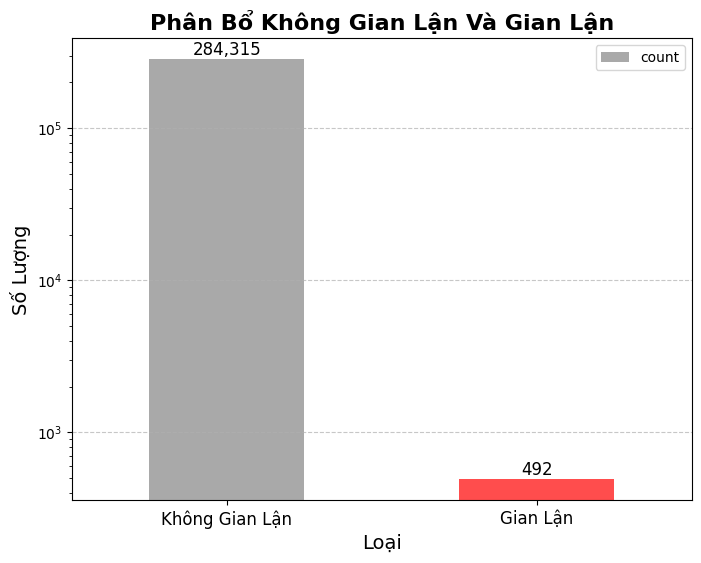

In [ ]:
import matplotlib.pyplot as plt

# Trực quan hóa dữ liệu gian lận và không gian lận
class_counts = df['Class'].value_counts()
fig, ax = plt.subplots(figsize=(8, 6))


# Vẽ biểu đồ với các cột có màu sắc rõ ràng hơn
class_counts.plot(kind='bar', color=['#A9A9A9', '#ff4d4d'])

# Thêm tiêu đề và nhãn
plt.title('Phân Bổ Không Gian Lận Và Gian Lận', fontsize=16, fontweight='bold')
plt.xlabel('Loại', fontsize=14)
plt.ylabel('Số Lượng', fontsize=14)
plt.legend()

# Sử dụng thang logarit cho trục Y
plt.yscale('log')

# Tùy chỉnh nhãn trên trục X
plt.xticks(ticks=[0, 1], labels=['Không Gian Lận', 'Gian Lận'], rotation=0, fontsize=12)

# Hiển thị gridlines để dễ đọc hơn
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Hiển thị giá trị chính xác trên đầu mỗi cột
for i in range(len(class_counts)):
    ax.text(i, class_counts[i], f'{class_counts[i]:,}', ha='center', va='bottom', fontsize=12)

# Hiển thị biểu đồ
plt.show()

In [ ]:
#drop cột Time vì nó không có giá trị khi phân tích
df_no_time = df.drop(['Time'], axis=1)
df_no_time.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#Chuẩn hóa dữ liệu cột Amount
from sklearn.preprocessing import StandardScaler
df_no_time['Amount'] = StandardScaler().fit_transform(df_no_time['Amount'].values.reshape(-1, 1))
df_no_time.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [ ]:
#Phân chia dữ liệu train test
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df_no_time , test_size=0.2, random_state=42)
#Điều chế dữ liệu
X_train = X_train[X_train['Class'] == 0]
X_train = X_train.drop(['Class'], axis=1)
#Điều chế X_test
y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)

X_train=X_train.values
X_test=X_test.values

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(227451, 29)
(56962, 29)
(56962,)


In [ ]:
from keras.models import load_model, Model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint
# Xây dựng Model
input_dimension = X_train.shape[1]
hidden_size =128
input_layer = Input(shape=(input_dimension,))
#Encoder
encoder = Dense(hidden_size, activation='relu')(input_layer)
encoder = Dense(int(hidden_size//2), activation='relu')(encoder)
encoder = Dense(int(hidden_size//4), activation='relu')(encoder)
#Decoder
decoder = Dense(int(hidden_size//4), activation='relu')(encoder)
decoder = Dense(int(hidden_size//2), activation='relu')(decoder)
decoder = Dense(hidden_size, activation='relu')(decoder)

#output
output_layer = Dense(input_dimension, activation='relu')(decoder)

auto_encoder_model = Model(inputs=input_layer, outputs=output_layer)
auto_encoder_model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
auto_encoder_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 29)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           3,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 29)                  │           3,741 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,405 (114.86 KB)

 Trainable params: 29,405 (114.86 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
#Train model
n_epochs =50
n_batch_size = 32
save_best = ModelCheckpoint(filepath="/content/drive/MyDrive/HoiQuyLogic/best.keras",
                               monitor='val_loss',
                               verbose=1,
                               save_best_only=True)
history = auto_encoder_model.fit(X_train, X_train,
                                 batch_size=n_batch_size,
                                 epochs=n_epochs,
                                 verbose=1,
                                 shuffle=True,
                                 callbacks=[save_best],
                                 validation_data=(X_test, X_test))
#

Epoch 1/50
7107/7108 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8834 - loss: 0.6129
Epoch 1: val_loss improved from inf to 0.65209, saving model to /content/drive/MyDrive/HoiQuyLogic/best.keras
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 40s 6ms/step - accuracy: 0.8834 - loss: 0.6129 - val_accuracy: 0.8802 - val_loss: 0.6521
Epoch 2/50
7085/7108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8805 - loss: 0.6073
Epoch 2: val_loss improved from 0.65209 to 0.65188, saving model to /content/drive/MyDrive/HoiQuyLogic/best.keras
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.8804 - loss: 0.6074 - val_accuracy: 0.8784 - val_loss: 0.6519
Epoch 3/50
7098/7108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8810 - loss: 0.6255
Epoch 3: val_loss improved from 0.65188 to 0.65160, saving model to /content/drive/MyDrive/HoiQuyLogic/best.keras
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.8810 - loss: 0.6255 - val_accuracy: 0.8838 - val_loss: 0.6516
Epoch 4/50
7099/7108 ━━━━━━━━━━━━━━━━━

In [ ]:

#Kiểm tra việc tái tạo trong tập test
import numpy as np

# dự đoán
predicts = auto_encoder_model.predict(X_test)
# tính loss(lỗi tái tạo từ AutoEnCoder)
mse = np.mean(np.power(X_test - predicts, 2), axis=1)
err_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


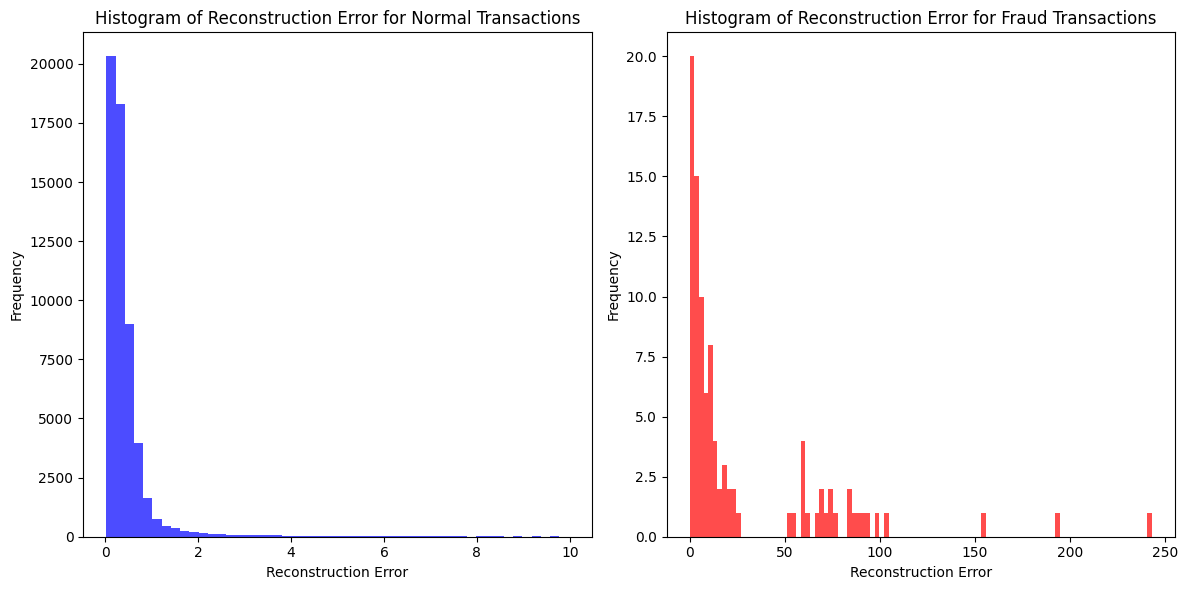

[76.96908549  0.69113975  0.15816702 ...  0.37533441  0.08036405
  1.53434072]
        reconstruction_error  true_class
43428              76.969085           1
49906               0.691140           0
29474               0.158167           0
276481              0.276970           0
278846              0.137720           0
...                      ...         ...
75723               0.500656           0
252263              0.190366           0
221246              0.375334           0
81910               0.080364           0
59490               1.534341           0

[56962 rows x 2 columns]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Dự đoán lỗi tái tạo bằng Autoencoder
predicts = auto_encoder_model.predict(X_test)
mse = np.mean(np.power(X_test - predicts, 2), axis=1)
err_df = pd.DataFrame({'reconstruction_error': mse, 'true_class': y_test})

# In ra histogram của error khi tái tạo các điểm Normal trong tập test
normal_error_df = err_df[(err_df['true_class'] == 0) & (err_df['reconstruction_error'] < 10)]
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(normal_error_df.reconstruction_error.values, bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Reconstruction Error for Normal Transactions')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')

# In ra histogram của error khi tái tạo các điểm Fraud trong tập test
fraud_error_df = err_df[err_df['true_class'] == 1]
plt.subplot(1, 2, 2)
plt.hist(fraud_error_df.reconstruction_error.values, bins=100, color='red', alpha=0.7)
plt.title('Histogram of Reconstruction Error for Fraud Transactions')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
print(mse)
print(err_df)


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter
import numpy as np

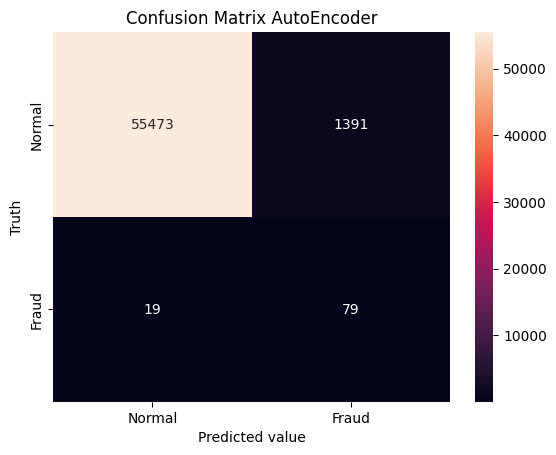

2.3


In [ ]:
#Vẽ ra confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

threshold = 2.3

#threshold = np.percentile(predicts, 95)
y_pred = [1 if e > threshold else 0 for e in err_df.reconstruction_error.values]
conf_matrix = confusion_matrix(err_df.true_class, y_pred)
 # vẽ
sns.heatmap(conf_matrix, xticklabels = ["Normal", "Fraud"], yticklabels =["Normal", "Fraud"], annot=True, fmt='d')
plt.title("Confusion Matrix AutoEncoder")
plt.ylabel('Truth')
plt.xlabel('Predicted value')
plt.show()
print(threshold)

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

# Chuẩn bị dữ liệu cho SMOTE từ lỗi tái tạo và true_class
X_train_lr = pd.DataFrame({'reconstruction_error': mse})
y_train_lr = err_df['true_class']

# Áp dụng SMOTE để tạo dữ liệu cân bằng
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_lr, y_train_lr)

# Huấn luyện Logistic Regression trên dữ liệu đã qua SMOTE
log_reg = LogisticRegression()
log_reg.fit(X_resampled, y_resampled)



LogisticRegression()

<ipython-input-31-cdcdf981274b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set2')


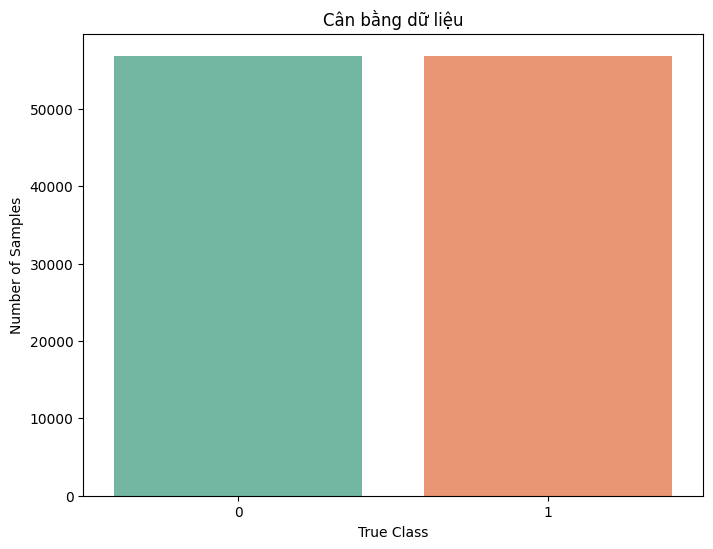

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo một DataFrame mới từ y_resampled để dễ vẽ biểu đồ
resampled_df = pd.DataFrame(y_resampled, columns=['true_class'])

# Đếm số lượng mẫu mỗi lớp sau khi SMOTE
class_counts = resampled_df['true_class'].value_counts()

# Vẽ biểu đồ cột để hiển thị số lượng mẫu của mỗi lớp
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set2')

# Đặt tiêu đề và nhãn cho biểu đồ
plt.title('Cân bằng dữ liệu')
plt.xlabel('True Class')
plt.ylabel('Number of Samples')

# Hiển thị biểu đồ
plt.show();


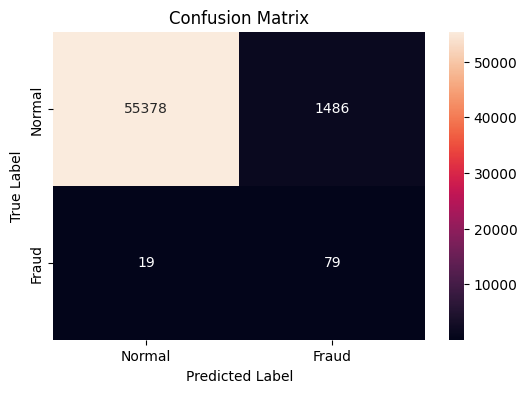

In [ ]:
# Dự đoán trên tập test
y_pred1 = log_reg.predict(X_train_lr)

# Tính toán ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_train_lr, y_pred1)

# Vẽ ma trận nhầm lẫn
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, xticklabels=["Normal", "Fraud"], yticklabels=["Normal", "Fraud"], annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from keras.models import load_model
import joblib

In [ ]:
# Lưu mô hình Keras
auto_encoder_model.save('/content/drive/MyDrive/HoiQuyLogic/auto_encoder_model9.keras')

# Lưu Logistic Regression model
import joblib
joblib.dump(log_reg, '/content/drive/MyDrive/HoiQuyLogic/logistic_regression_model9.pkl')

['/content/drive/MyDrive/HoiQuyLogic/logistic_regression_model9.pkl']

In [ ]:
def predict_transaction_status(input_data):
    """
    Dự đoán trạng thái của giao dịch dựa trên đầu vào.
    """
    # Dự đoán lỗi tái tạo
    reconstructed_data = auto_encoder_model.predict(input_data)
    reconstruction_error = np.mean(np.power(input_data - reconstructed_data, 2), axis=1)

    # Tạo dữ liệu đầu vào cho Logistic Regression
    input_data_with_error = np.array([[error] for error in reconstruction_error])

    # Dự đoán lớp với Logistic Regression
    predicted_class = log_reg.predict(input_data_with_error)

    return ["Normal" if cls == 0 else "Fraud" for cls in predicted_class]

# Đọc dữ liệu từ Excel
data = pd.read_excel('/content/drive/MyDrive/HoiQuyLogic/input_data (1) (1).xlsx')

# Giả sử dữ liệu chứa các cột từ V1 đến V28
input_features = data[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
                       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
                       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]

# Dự đoán
results = predict_transaction_status(input_features.values)

# Ghi kết quả vào file Excel mới
#data['Prediction'] = results
#data.to_excel('predicted_results.xlsx', index=False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Ghi kết quả vào file Excel mới trong cùng thư mục trên Google Drive
output_path = '/content/drive/MyDrive/HoiQuyLogic/predicted_results.xlsx'
data['Prediction'] = results
data.to_excel(output_path, index=False)

print(f"Kết quả đã được lưu tại: {output_path}")

Kết quả đã được lưu tại: /content/drive/MyDrive/HoiQuyLogic/predicted_results.xlsx
